In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rutafin = 'C:/Users/omarc/OneDrive/Escritorio/Proyectos VSC/OmarCano/Track Analítico UNI/05_Datos/03_Datos_Finales'

tablon_final_df = pd.read_csv(f'{rutafin}/tablon_final_df.csv')
df_modelo = tablon_final_df[tablon_final_df['FLG_ESTUDIANTE'] == 1].copy()

df_modelo['DOMICILIO_DEPA'] = df_modelo['DOMICILIO_DEPA'].fillna('DESCONOCIDO').astype(str).str.upper()
df_modelo['NACIMIENTO_DEPA'] = df_modelo['NACIMIENTO_DEPA'].replace('0', 'DESCONOCIDO').astype(str).str.upper()
df_modelo['NACIMIENTO_PAIS'] = df_modelo['NACIMIENTO_PAIS'].replace('0', 'DESCONOCIDO').astype(str).str.upper()
df_modelo['COLEGIO_PAIS'] = df_modelo['COLEGIO_PAIS'].replace('0', 'DESCONOCIDO').astype(str).str.upper()
df_modelo['COLEGIO_DEPA'] = df_modelo['COLEGIO_DEPA'].replace('0', 'DESCONOCIDO').astype(str).str.upper()

lima = ['LIMA']
callao = ['CALLAO']
costa = ['PIURA', 'TUMBES','LAMBAYEQUE','LA LIBERTAD','ÁNCASH','ANCASH','ICA','MOQUEGUA', 'AREQUIPA','TACNA']
sierra = ['CAJAMARCA','HUÁNUCO','HUANUCO','PASCO', 'JUNIN', 'JUNÍN', 'HUANCAVELICA', 'AYACUCHO','APURIMAC','APURÍMAC', 
        'CUSCO', 'PUNO']
selva = ['AMAZONAS', 'SAN MARTÍN', 'UCAYALI', 'MADRE DE DIOS', 'LORETO']

def clasificar_macroregion(depa):
    if depa in lima:
        return 'Lima'
    elif depa in callao:
        return 'Callao'
    elif depa in costa:
        return 'Costa'
    elif depa in sierra:
        return 'Sierra'
    elif depa in selva:
        return 'Selva'
    else:
        return 'Desconocido'

df_modelo['DOMICILIO_MACROREGION'] = df_modelo['DOMICILIO_DEPA'].apply(clasificar_macroregion)
df_modelo['NACIMIENTO_MACROREGION'] = df_modelo['NACIMIENTO_DEPA'].apply(clasificar_macroregion)
df_modelo['COLEGIO_MACROREGION'] = df_modelo['COLEGIO_DEPA'].apply(clasificar_macroregion)

peru = ['PERÚ','PERU']
extranjero = ['ARGENTINA','VENEZUELA','JAPON','COREA REPUBLICA','ITALIA','ESTADOS UNIDOS','BRASIL','SUIZA','COLOMBIA','RSS DE UCRANIA',
            'PARAGUAY','CHILE','FRANCIA','NUEVA ZELANDA','BOLIVIA','RUSIA','GUATEMALA','ALEMANIA','ESPAÑA']

def clasificar_pais(pais):
    if pais in peru:
        return 'Perú'
    elif pais in extranjero:
        return 'Extranjero'
    else:
        return 'Desconocido'

df_modelo['NACIMIENTO_PAIS'] = df_modelo['NACIMIENTO_PAIS'].apply(clasificar_pais)
df_modelo['COLEGIO_PAIS'] = df_modelo['COLEGIO_PAIS'].apply(clasificar_pais)

In [3]:
# 1. Definir las variables categóricas y numéricas
categorical_features = [
    'MODALIDAD_AGRUP', 'DOMICILIO_MACROREGION', 'NACIMIENTO_MACROREGION', 'COLEGIO_MACROREGION', 
    'NACIMIENTO_PAIS', 'COLEGIO_PAIS'
]

numeric_features = [
    'CICLO_RELATIVO','EDAD','EDAD_FIN_COLEGIO','EDAD_INICIO_UNI','FLG_CAMBIO_CARRERA',
    'MIN_CALIF_ADMIS','MAX_CALIF_ADMIS','PROM_CALIF_ADMIS', 'CANT_ADMIS', 
    'MIN_CALIF_CEPRE', 'MAX_CALIF_CEPRE','PROM_CALIF_CEPRE', 'CANT_CEPRE'
]

In [4]:
# 2. Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  
            ('scaler', StandardScaler())  
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')), 
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')) 
        ]), categorical_features)
    ]
)

In [5]:
# 3. Preparación de las variables para el modelo
X = df_modelo[numeric_features + categorical_features]
y = df_modelo['DESERCIÓN'] 

In [6]:
# 4. División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# 5. Creación del pipeline con los mejores parámetros encontrados
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), 
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42
    ))
])

In [8]:
# 6. Entrenamiento del modelo final
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CICLO_RELATIVO', 'EDAD',
                                                   'EDAD_FIN_COLEGIO',
                                                   'EDAD_INICIO_UNI',
                                                   'FLG_CAMBIO_CARRERA',
                                                   'MIN_CALIF_ADMIS',
                                                   'MAX_CALIF_ADMIS',
                                                   'PROM_CALIF_ADMIS',
                                                   'CANT_ADMIS',
                                                   'MIN_CALIF_CEPRE',
                                                   'MAX_CALIF_CEPRE',
                                                   'PROM_CALIF_CEPRE'...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['MODALIDAD_AGRUP',
                                                   'DOMICILIO_MACROREGION',
                                                   'NACIMIENTO_MACROREGION',
                                                   'COLEGIO_MACROREGION',
                                                   'NACIMIENTO_PAIS',
                                                   'COLEGIO_PAIS'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [9]:
# 7. Evaluación del modelo final
y_pred = pipeline.predict(X_test)
y_probs = pipeline.predict_proba(X_test)[:, 1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[49451  3835]
 [ 1327  3104]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     53286
           1       0.45      0.70      0.55      4431

    accuracy                           0.91     57717
   macro avg       0.71      0.81      0.75     57717
weighted avg       0.93      0.91      0.92     57717



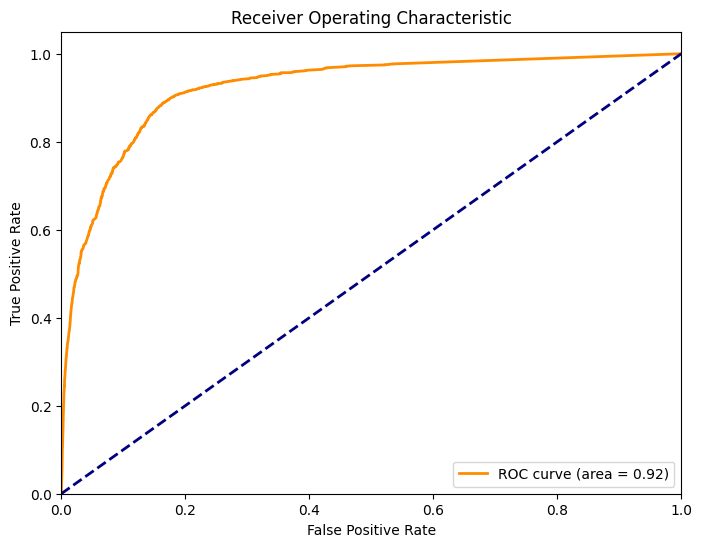

In [10]:
# 8. Gráficos de la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [11]:
# 9. Importancia de las características
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1]['encoder'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nCaracterísticas más importantes:")
print(importance_df.head(10))


Características más importantes:
                        Feature  Importance
0                CICLO_RELATIVO    0.381038
1                          EDAD    0.161098
3               EDAD_INICIO_UNI    0.124183
9               MIN_CALIF_CEPRE    0.034492
11             PROM_CALIF_CEPRE    0.034406
10              MAX_CALIF_CEPRE    0.033867
26   DOMICILIO_MACROREGION_Lima    0.022514
27  DOMICILIO_MACROREGION_Selva    0.020070
12                   CANT_CEPRE    0.016150
5               MIN_CALIF_ADMIS    0.014226


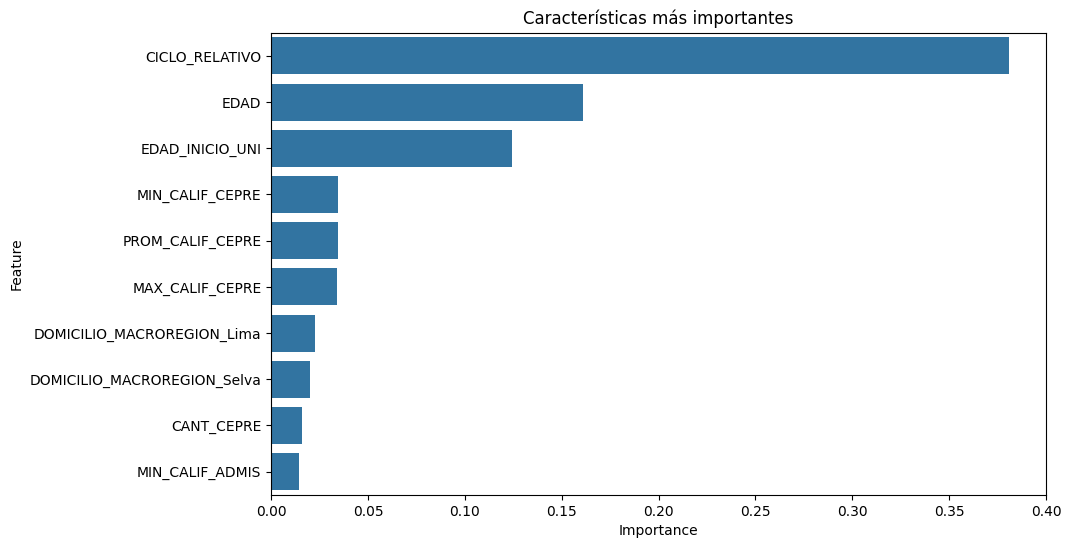

In [12]:
# Visualización de las 10 características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Características más importantes')
plt.show()

In [13]:
df_resultado = pd.DataFrame({
    'IDHASH': df_modelo.loc[X_test.index, 'IDHASH'],
    'Predicción': y_pred,  
    'Probabilidad_Desercion': y_probs  
})

df_resultado.to_csv(f'{rutafin}/predicciones_modelo.csv', index=False)